# Title: Maximizing Customer Retention: A Churn Prediction Analysis The for Vodafone Group

## Project description

Customer attrition is a prevalent problem for many businesses, resulting in large financial losses. We intend to investigate customer churn or attrition in this project, which refers to the percentage of consumers that discontinue using a company's product or service within a specified time frame. Understanding the primary causes of customer churn can assist businesses in developing effective retention strategies to reduce customer attrition and boost revenue.

This project's dataset includes information about users' demographics, service usage, and billing information. We will use this dataset to conduct an exploratory data analysis in order to find patterns and trends linked to customer attrition. We will next use machine learning techniques to create a predictive model that will estimate the likelihood of a customer leaving the firm.

__Our project's objectives are to:__

1.Investigate and display the data to uncover patterns and trends in customer attrition.

2.Using machine learning methods, create a predictive model to forecast the possibility of client attrition.

3.Determine the major churn indicators, such as client demographics, service usage, and billing information.

4.Create retention techniques to assist reduce client turnover while increasing customer loyalty.

5.Based on the model's results, assess the success of retention efforts and make recommendations for changes.

The project's outcome will provide valuable insights for Vodafone to understand customer churn and implement effective retention strategies to reduce customer attrition and increase revenue.


## Hypothesis 

Null hypothesis : 

Gender has a significant impact on churn for vodafone customers. 

Alternative hypothesis :

Gender doesnot have a significant impact on churn for vodafone customers      

Null hypothesis:
There is no significant relationship between the dependents and their likelihood to churn.

Alternative hypothesis:
There is a significant relationship between the dependents and their likelihood to churn.    

## Questions 

1. Which age group (Senior Citizen Column) paid the highest monthly charges?
2. Which gender has the highest count of churn ? 
3. Which Internet Service is patronized the most?
4. How much total charge and monthly charge revenue does churners generate?
5. Which payment method is the most popular?

## Library Installation

In [283]:

##!pip install imblearn ##for handling imbalanace data
##! pip install phik ##for our phik correlation

# Library Importation

In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 

import matplotlib.pyplot as plt 
%matplotlib inline
import matplotlib.ticker as mtick
import seaborn as sns 
import random

import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# Feature Processing (Scikit-learn processing, etc. )
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report

#Algorithms and pipeline

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 

##handling imbalance datasets

from imblearn.combine import SMOTEENN

from sklearn.utils import class_weight
...

# Other packages
import os


# Data Loading

In [285]:
df= pd.read_csv("Desktop/Pandas/Azubi/LP3/Telco-Customer-Churn.csv")
#df =pd.read_csv("datahub\LP3\Telco-Customer-Churn.csv")

In [286]:
##taking a look at our dataset
df

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

# Exploratory Data Analysis

## Dataset Overview

In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Notes of .info():

- Also, the TotalCharges column is an object data type, so we might want to check that. 
- There are no missing values
- We have a total of 7043 rows 
- We have a total of 21 columns 
- Our target variable has  yes/no attributes, therefore it is a binary classification problem

In [288]:
df.describe(include="all").transpose()

count unique               top  freq       mean        std  \
customerID          7043   7043        7590-VHVEG     1        NaN        NaN   
gender              7043      2              Male  3555        NaN        NaN   
SeniorCitizen     7043.0    NaN               NaN   NaN   0.162147   0.368612   
Partner             7043      2                No  3641        NaN        NaN   
Dependents          7043      2                No  4933        NaN        NaN   
tenure            7043.0    NaN               NaN   NaN  32.371149  24.559481   
PhoneService        7043      2               Yes  6361        NaN        NaN   
MultipleLines       7043      3                No  3390        NaN        NaN   
InternetService     7043      3       Fiber optic  3096        NaN        NaN   
OnlineSecurity      7043      3                No  3498        NaN        NaN   
OnlineBackup        7043      3                No  3088        NaN        NaN   
DeviceProtection    7043      3                No  3095        NaN        NaN   
TechSupport         7043      3                No  3473        NaN        NaN   
StreamingTV         7043      3                No  2810        NaN        NaN   
StreamingMovies     7043      3                No  2785        NaN        NaN   
Contract            7043      3    Month-to-month  3875        NaN        NaN   
PaperlessBilling    7043      2               Yes  4171        NaN        NaN   
PaymentMethod       7043      4  Electronic check  2365        NaN        NaN   
MonthlyCharges    7043.0    NaN               NaN   NaN  64.761692  30.090047   
TotalCharges        7043   6531                      11        NaN        NaN   
Churn               7043      2                No  5174        NaN        NaN   

                    min   25%    50%    75%     max  
customerID          NaN   NaN    NaN    NaN     NaN  
gender              NaN   NaN    NaN    NaN     NaN  
SeniorCitizen       0.0   0.0    0.0    0.0     1.0  
Partner             NaN   NaN    NaN    NaN     NaN  
Dependents          NaN   NaN    NaN    NaN     NaN  
tenure              0.0   9.0   29.0   55.0    72.0  
PhoneService        NaN   NaN    NaN    NaN     NaN  
MultipleLines       NaN   NaN    NaN    NaN     NaN  
InternetService     NaN   NaN    NaN    NaN     NaN  
OnlineSecurity      NaN   NaN    NaN    NaN     NaN  
OnlineBackup        NaN   NaN    NaN    NaN     NaN  
DeviceProtection    NaN   NaN    NaN    NaN     NaN  
TechSupport         NaN   NaN    NaN    NaN     NaN  
StreamingTV         NaN   NaN    NaN    NaN     NaN  
StreamingMovies     NaN   NaN    NaN    NaN     NaN  
Contract            NaN   NaN    NaN    NaN     NaN  
PaperlessBilling    NaN   NaN    NaN    NaN     NaN  
PaymentMethod       NaN   NaN    NaN    NaN     NaN  
MonthlyCharges    18.25  35.5  70.35  89.85  118.75  
TotalCharges        NaN   NaN    NaN    NaN     NaN  
Churn               NaN   NaN    NaN    NaN     NaN

### __Key Notes__:

__SeniorCitizen__: 

- This is a binary variable that indicates whether or not the customer is a senior citizen. 

- The output shows that out of 7,043 observations, 16.2% (or about 1,142) are senior citizens on average.

__tenure__: 

- This variable represents the number of months the customer has been with the company. 

- The output shows that on average, customers have been with the company for 32.4 months, but the standard deviation is quite large (24.6 months), indicating that there is a wide range of values for this variable. 

- Less than 75% of the customers spend less than 55 months with the company.

__MonthlyCharges__:  

- This variable represents the amount the customer pays each month for the company's services. 

- The output shows that on average, customers pay \\$64.76 per month, with 75 percent paying less than  \\$89.85. 

- Again, the standard deviation is quite large (30.1 dollars), indicating that there is a wide range of values for this variable as well. 


#### Note:

since our total charges column is a object dataframe, we will be creating a copy of our dataset and use the copy for our EDA with our TotalCharges being converted to numeric. We will use the orginal frame for our modelling and build a pipeline which can handle everything. 

In [289]:
##let's create a copy to make  it easy for us to revert to our original dataframe if we make a mistake

df_copy= df.copy()

### Converting the totalcharges column to a numerical variable

from .info(), we realized that the TotalCharge feature was an object data type; however, looking at it, it was an object, there we willbe chaning it to a numeric data type 

In [290]:
df_copy["TotalCharges"]= pd.to_numeric(df_copy["TotalCharges"], errors= "coerce")

In [291]:
##Let's check to see if there are any further missing values

df_copy.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

there are 11 missing values so we will replace them with the mean of the TotalCharges column

In [292]:
df_copy["TotalCharges"].mean()

2283.3004408418697

In [293]:
df_copy.fillna(value= df_copy["TotalCharges"].mean(), inplace= True)

In [294]:
##Let's check again for missing values
df_copy.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [295]:
##Since there are no more missing values, we can proceed to use the df_copy for our analysis

In [296]:
##We will like to drop our ID column for both dataset since it composes of unique values

In [297]:
df= df.drop("customerID", axis= 1)

df_copy= df_copy.drop("customerID", axis= 1)

##Note we will be using the df_copy for our analysis and the df for our modeling 

In [298]:
### I am saving it so that I can use it for power BI:

df_copy.to_csv("Desktop/Vodafone_churn.csv")

## Univariate Analysis 

In [299]:
##Let's take a look at the distrubution of the columns 
##this our funciton allows you to plot any number of columns 

def plot_distribution(df,cols):
    for col in cols:
        sns.displot(df[col],kde= True)
        plt.figure(figsize=(5,5))

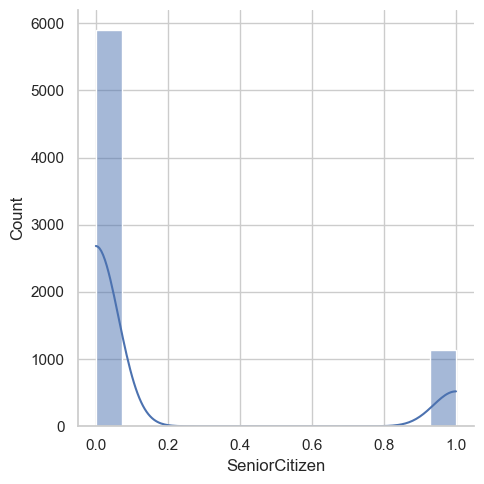

<Figure size 500x500 with 0 Axes>

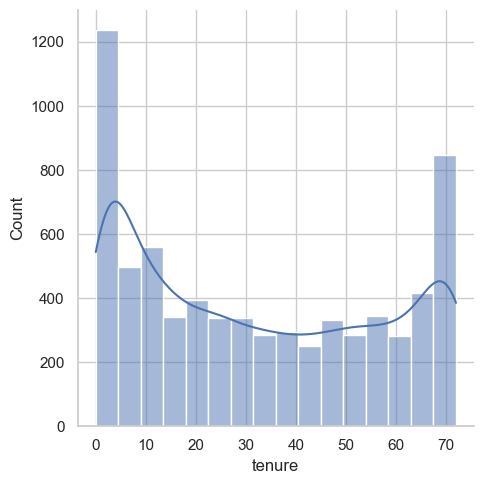

<Figure size 500x500 with 0 Axes>

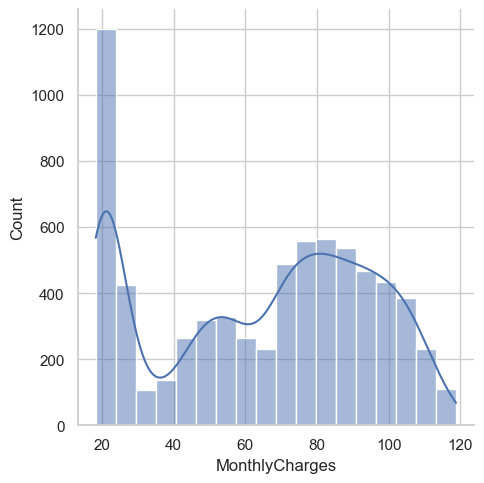

<Figure size 500x500 with 0 Axes>

In [300]:
##we are using the function above to plot the distrubution of the columns below
plot_distribution(df_copy, ['SeniorCitizen', 'tenure', 'MonthlyCharges']);


In [301]:
df_copy.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

__Observations__:

- Most customers for vodafone are non-senior citizens

- Most customers pay a monthly charge of 20 units 

- Most customers stay on the network for 0 months, and 70 months

In [302]:
##checking for outliers 

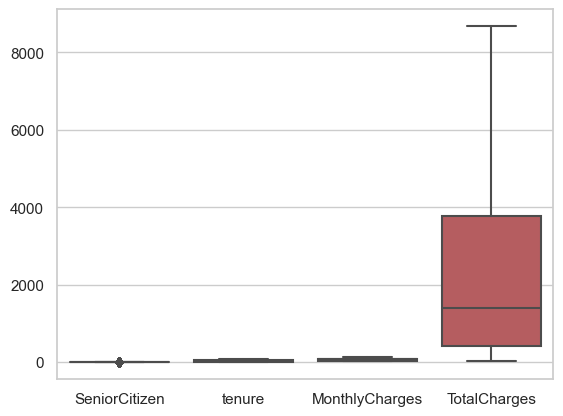

In [303]:
sns.boxplot(data=df_copy);

##### Observation:

- It can be seen that there are no outliers 

### Univariate on the Churn Column

In [304]:
##the idea here is to check to see the ratio of our label variables 

In [305]:
##sns.countplot(x = df_copy["Churn"], data = df_copy)
##plt.title("Plot of Ratio of the Label Variables(Churn)")

fig = px.pie(df_copy, names='Churn', title='Plot of Ratio of the Label Variables (Churn)')
fig.show()

In [306]:
##let's see the percentage

count= df_copy["Churn"].value_counts()

percen= count/len(df_copy["Churn"]) *100
print("The percentage of No is: ", round(percen[0], 2))
print("The percentage of Yes is: ", round(percen[1], 2))

The percentage of No is:  73.46
The percentage of Yes is:  26.54


In [307]:
##checking the ratio of non-churners to churners
percen[0]/percen[1]

2.76832530765115

#### Notes from exploring the Label Variable:

- We can see there is an imbalance in our dataset; therefore we will have to deal with that.

- 73% of the vodafone customers are still loyal

- 26.54% of the customers in the current dataset have left the company 

- Those who are still in the company are 2.77 times larger than those who have left 

In [308]:
df_copy.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [309]:
##We can see the tenure has 73 unique values, therefore it will be a good idea to bin it up to help make our analysis easier.

labels= ["{0} - {1}".format(i,i+11) for i in range (0, 73, 12) ]

df_copy["tenure_group"]= pd.cut(df_copy.tenure, range(1, 80, 12), right= False, labels=labels[:-1])

#### We are Trying to visualize to see how each categorical column variaes with Churn

In [310]:
for  col in df_copy.drop(["Churn", "tenure", "MonthlyCharges", "TotalCharges"], axis= 1):
    fig= px.histogram(df_copy, color= "Churn", x= col, title= f"Count of {col}, with respect to Churn")
    fig.show()

In [311]:
##in this code, we are checking to see the churn YES to NO churn percentage of each categorical feature

"""
for col in df_copy.drop(["Churn", "tenure", "MonthlyCharges", "TotalCharges"], axis= 1):
    churn_by_col = df_copy.groupby(col)['Churn'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
    fig = px.bar(churn_by_col, x=col, y='percent', color='Churn', text='percent', title= f"Percentage of: {col} with respect to Churn")
    fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
    fig.show() """

'\nfor col in df_copy.drop(["Churn", "tenure", "MonthlyCharges", "TotalCharges"], axis= 1):\n    churn_by_col = df_copy.groupby(col)[\'Churn\'].value_counts(normalize=True).mul(100).rename(\'percent\').reset_index()\n    fig = px.bar(churn_by_col, x=col, y=\'percent\', color=\'Churn\', text=\'percent\', title= f"Percentage of: {col} with respect to Churn")\n    fig.update_traces(texttemplate=\'%{text:.2f}%\', textposition=\'outside\')\n    fig.show() '

In [312]:
##in this code, we are checking to see the churn YES to NO churn percentage of each categorical feature

for col in df_copy.drop(["Churn", "tenure", "MonthlyCharges", "TotalCharges"], axis=1):
    churn_by_col = df_copy.groupby(col)['Churn'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
    unique_churn_categories = churn_by_col['Churn'].unique()
    color_list = random.sample(px.colors.qualitative.Plotly, len(unique_churn_categories))
    fig = px.bar(churn_by_col, x=col, y='percent', color='Churn', text='percent', title=f"Percentage of: {col} with respect to Churn",
                 color_discrete_sequence=color_list)
    fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
    fig.show()

### Notes after Analysis:

- Individuals with 0 to 11 months of use are most likely to churn
- Individuals with electronic checks churn the most 
- Individuals on the fiber optics plan had the highest churn
- Female customers churned more than male customers 
- Even though there were more non senior citizens than senior citizens (from our count plot), senior citizens churned more percentage-wise. This could be because of old age, death or other factors. 
- Customers with no dependents are most likely to churn 

## Bivariate Analysis

In [313]:
"""Let's see the relationship between monthly charges and totalcharges. We will like to see if total charges increase 
with Monthlycharges """

px.scatter(df_copy, x="MonthlyCharges", y= "TotalCharges")

In [314]:
##Let's see the relationship between TotalCharges and tenure, how does one using the network for long affec their total charge

px.scatter(df_copy, x="tenure", y= "TotalCharges")

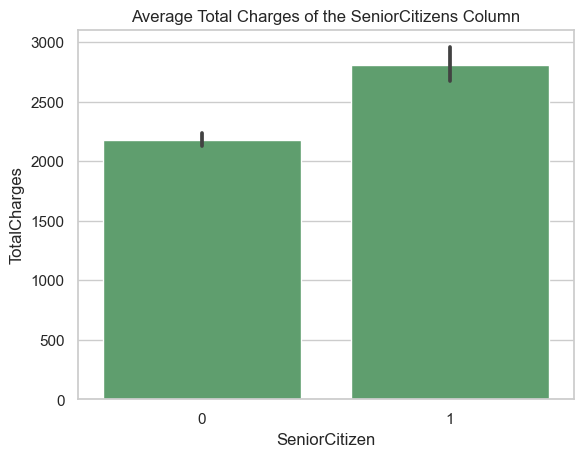

<Figure size 2000x1500 with 0 Axes>

In [315]:
##Let's see which age group is most likely to pay the highest totalcharges

sns.set_theme(style="whitegrid")
sns.barplot(x="SeniorCitizen", y="TotalCharges", data=df_copy, color = 'g')
plt.title("Average Total Charges of the SeniorCitizens Column")
#plt.xticks(rotation=90)
plt.figure(figsize= (20,15))
plt.show();

#### Notes From Bivariate Analysis:

- We can see that total charges and monthly charges have a positive correlation. Therefore, the more monthly charges a customer pays, the more likely their totalcharge will increase 

- Also, total charges and tenure has a positive correlation. Therefore, the more time (tenure) a customer spends the more total charges they pay 

- Also, on average, senior citzens are paying a higher total charge than non-senior citizens

### Multivariate

<Axes: >

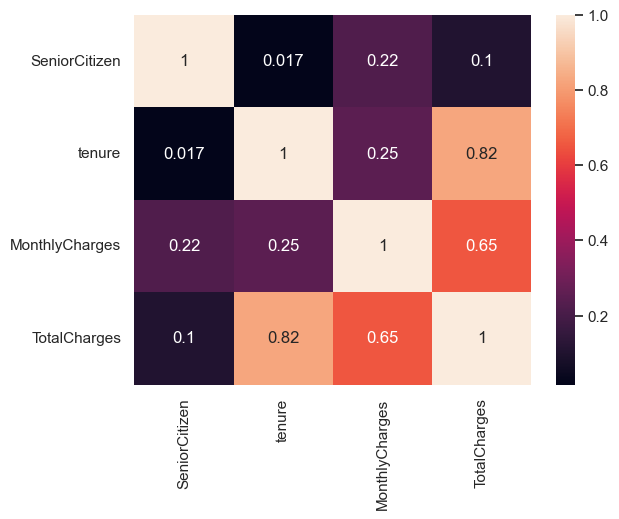

In [316]:
sns.heatmap(df_copy.corr(), annot= True)

## Answering Questions 

We will be answering the questions below:

1. Which age group paid the highest total charge?
2. Which gender has the highest count of churn ? 
3. Which Internet Service is patronized the most?
4. How much total charge and monthly charge revenue does churners generate?
5. Which payment method is the most popular?

#### Question 1: Which Age Group paid the highest Monthly Charges 

<Axes: xlabel='SeniorCitizen', ylabel='TotalCharges'>

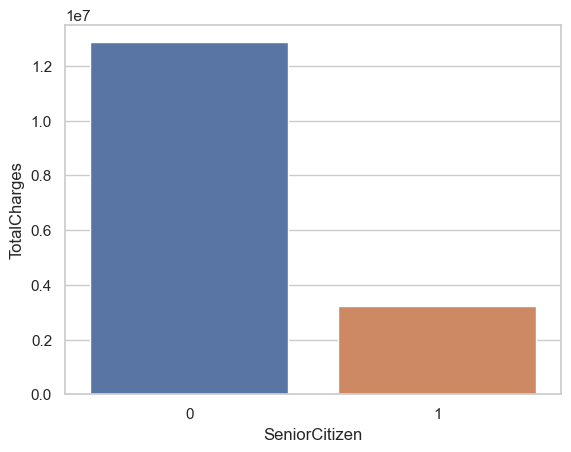

In [317]:
##The only age group given to us was the seniors column, therefore, we will see the amount each group paid 

sum_agegroup= df_copy.groupby("SeniorCitizen").agg({"TotalCharges": "sum"}).reset_index()

sns.barplot(x= "SeniorCitizen", y= "TotalCharges", data= sum_agegroup)

#### Answer to Question1:

- From the chart above, we can see that non-senior citizens spend more money (interms of total charges) than senior citizens

#### Question 2: Which Gender Recorded the highest Churn

In [318]:
churners= df_copy[df_copy["Churn"]== "Yes"]

In [319]:
px.histogram(x="gender", data_frame=churners, color= "gender", color_discrete_sequence=["teal", "grey"], title= "Plot of the Occurence Of Churn Across the Various Gender")

#### Answer to Question2:
- Females tend to churn more than males 

### Question 3: Which Internet Service Is Patronized The Most?



In [320]:
internet_count= df.InternetService.value_counts().to_frame(name= "count")

In [321]:
internet_count

count
Fiber optic   3096
DSL           2421
No            1526

In [322]:
fig = px.scatter(internet_count, x=internet_count.index, y='count', size='count', color= internet_count.index, hover_name=internet_count.index,
                 log_y=False, size_max=60, title= "Plot of The Popularity Of The Various Internet Services")

fig.show()

#### Answer to Question3:

- Fiber Options was the most patronized Internet Service 

#### Question 4: How much total charge and monthly charge revenue does churners generate?

In [323]:
##since we are looking at churners, we will use the churners dataframe

In [324]:
money= churners.agg({"MonthlyCharges": "sum", "TotalCharges": "sum"}).reset_index()

money.columns= ["Charge", "Amount"]

px.bar(data_frame= money, x= "Charge",
       
       y= "Amount", title= "Amount Paid By Churners In Terms", text= "Amount", color= "Charge", color_discrete_sequence= ["yellow", "black"])

#### Answer to Question 4:

From the dataframe above, we can see that customers that churned generataed a whooping \\$139130 in monthly charges and \\$2,862,927 in total charges. This means Vodafone is losing \\$139130 monthly and a total of \\$2,862,927 due to Churns







#### Question 5: Which payment method is the most popular?

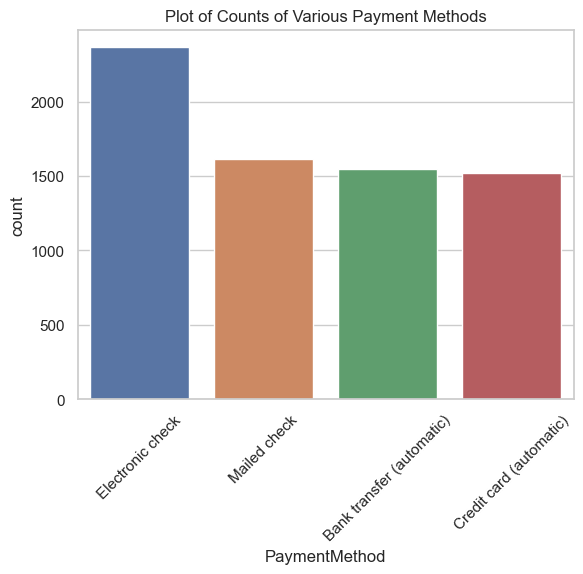

<Figure size 1500x500 with 0 Axes>

In [325]:
sns.countplot(x="PaymentMethod", data=df )
plt.title("Plot of Counts of Various Payment Methods")
plt.xticks(rotation= 45)
plt.figure(figsize= (15,5))
plt.show()

#### Answer to Question 5:
- We can see that electronic Check is the most popular payment method

### Note:

- Now we are done with our analysis, therefore, we will be using our df for our modelling. 

## Primary Feature Selection:

- in this section we will be selecting the best features for our algorithm. We will be using the Phi-Correlation

In [326]:
import phik

In [327]:
##getting the correlation of other features with churn

churn_corr= df.phik_matrix().loc["Churn"]

interval columns not set, guessing: ['SeniorCitizen', 'tenure', 'MonthlyCharges']


In [328]:
##sorting the values 
churn_cor=churn_corr.sort_values()

churn_cor

gender              0.000000
TotalCharges        0.000000
PhoneService        0.000000
MultipleLines       0.021922
StreamingTV         0.139246
StreamingMovies     0.139522
DeviceProtection    0.170762
OnlineBackup        0.177422
InternetService     0.196202
TechSupport         0.209021
OnlineSecurity      0.211840
Partner             0.232930
SeniorCitizen       0.233432
Contract            0.251639
Dependents          0.253936
PaperlessBilling    0.295754
MonthlyCharges      0.360050
PaymentMethod       0.449125
tenure              0.474001
Churn               1.000000
Name: Churn, dtype: float64

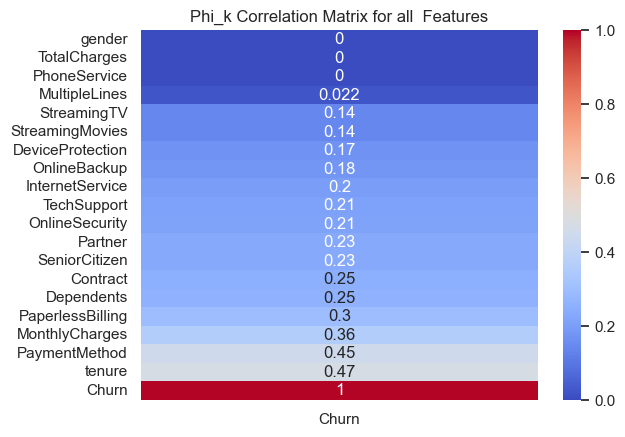

<Figure size 1000x1500 with 0 Axes>

In [329]:
##ploting the phi-k correlation mattress
sns.heatmap(churn_cor.to_frame(), annot= True, cmap= "coolwarm")

plt.title("Phi_k Correlation Matrix for all  Features")

plt.figure(figsize= (10,15));

From our feature selection, we will be dropping columns with correlation coeeficient less than 0.2:
    
    - Gender
    - PhoneService
    - MultipleLines
  
    
    
Since they have a correlation less than 0.1

In [330]:
df_drop= df.drop(["gender", "PhoneService", "MultipleLines"], axis= 1)

In [331]:
df_drop

SeniorCitizen Partner Dependents  tenure InternetService OnlineSecurity  \
0                 0     Yes         No       1             DSL             No   
1                 0      No         No      34             DSL            Yes   
2                 0      No         No       2             DSL            Yes   
3                 0      No         No      45             DSL            Yes   
4                 0      No         No       2     Fiber optic             No   
...             ...     ...        ...     ...             ...            ...   
7038              0     Yes        Yes      24             DSL            Yes   
7039              0     Yes        Yes      72     Fiber optic             No   
7040              0     Yes        Yes      11             DSL            Yes   
7041              1     Yes         No       4     Fiber optic             No   
7042              0      No         No      66     Fiber optic            Yes   

     OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  \
0             Yes               No          No          No              No   
1              No              Yes          No          No              No   
2             Yes               No          No          No              No   
3              No              Yes         Yes          No              No   
4              No               No          No          No              No   
...           ...              ...         ...         ...             ...   
7038           No              Yes         Yes         Yes             Yes   
7039          Yes              Yes          No         Yes             Yes   
7040           No               No          No          No              No   
7041           No               No          No          No              No   
7042           No              Yes         Yes         Yes             Yes   

            Contract PaperlessBilling              PaymentMethod  \
0     Month-to-month              Yes           Electronic check   
1           One year               No               Mailed check   
2     Month-to-month              Yes               Mailed check   
3           One year               No  Bank transfer (automatic)   
4     Month-to-month              Yes           Electronic check   
...              ...              ...                        ...   
7038        One year              Yes               Mailed check   
7039        One year              Yes    Credit card (automatic)   
7040  Month-to-month              Yes           Electronic check   
7041  Month-to-month              Yes               Mailed check   
7042        Two year              Yes  Bank transfer (automatic)   

      MonthlyCharges TotalCharges Churn  
0              29.85        29.85    No  
1              56.95       1889.5    No  
2              53.85       108.15   Yes  
3              42.30      1840.75    No  
4              70.70       151.65   Yes  
...              ...          ...   ...  
7038           84.80       1990.5    No  
7039          103.20       7362.9    No  
7040           29.60       346.45    No  
7041           74.40        306.6   Yes  
7042          105.65       6844.5    No  

[7043 rows x 17 columns]

## Modeling 

Note:
- We will be using the df_drop dataframe for our analysis 

In [332]:
df_drop.replace(r'^\s*$', np.nan, regex=True).isna().sum()

SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### Step 1: Data Splitting

In [333]:
from sklearn.model_selection import train_test_split

In [334]:
X= df_drop.drop("Churn", axis=1)
y= df_drop.Churn

In [335]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

### Step 2: Creating Our Attributes

In [336]:

##getting our categorical attributes 
cat_attr= [i for i in df_drop.drop(["TotalCharges", "MonthlyCharges", "tenure", "Churn"], axis= 1)]


##getting our numerical attributes
num_attr= ["TotalCharges", "MonthlyCharges", "tenure"]


In [337]:
cat_attr

['SeniorCitizen',
 'Partner',
 'Dependents',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [338]:
num_attr

['TotalCharges', 'MonthlyCharges', 'tenure']

### Step 3: Creating Pipeline

#### Creating numeric pipeline

##### For Our Empty Rows:

- We will create a function to handle that

##### For our numeric values, we need to:

- Scale since our monthly transaction and total transaction are of different magnitudes and also since we will be using models sensitive to unscaled values.

- Also, we will create a function to handle the missing values in the numeric attribute. 


##### For our categorical 

- We will need to transform our categorical features to numeric using a onehotencoder
- We will also handle data in balance using Sklearns class_balance



In [339]:
### handling the empty space. The aim of the this function is to replace the missing values with NaN values

def remove_space(in_df):
    in_df["TotalCharges"]= in_df["TotalCharges"].replace(r"^\s*$", np.nan, regex= True)
    return in_df

In [340]:
"""Since we cannot fit and transform the function above, we will create a class with the function embedded to help 

us call, fit, and transform with the function above"""

class SpaceImputer():
    def __init__(self,func):
        self.func= func
    
    def transform(self, in_df, **transform_params):
        return self.func(in_df)
    
    def fit(self, X, y=None, **fit_params):
        return self
        

In [341]:
X_train.isna().sum()

SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [342]:
##This pipeline will handle the nan values in our dataset and also standardize our

## we are using mean because from our previous analysis, there were no outliers

num_pipeline= Pipeline([("mean_imputer", SimpleImputer(strategy="mean")), ("scaler", StandardScaler())])

cat_pipeline= Pipeline([("one_hot", OneHotEncoder())])

In [343]:
##we are combining our numeric and categorical pipelines with a Columntransformer

col_pipe= ColumnTransformer([("num_pipe", num_pipeline, num_attr),("cat_pipe", cat_pipeline, cat_attr)])


### Creating a pipeline for each Classifier (ML Algorithm)

#### DecisionTree CLassifier


In [344]:

DTP= Pipeline([("spaceImputer", SpaceImputer(remove_space)),
               ("coltrans", col_pipe), 
               ("model",DecisionTreeClassifier(random_state= 100, max_depth= 6, min_samples_leaf= 8))
              ])

In [345]:
DTP.fit(X_train, y_train)

Pipeline(steps=[('spaceImputer',
                 <__main__.SpaceImputer object at 0x0000024E76E287F0>),
                ('coltrans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('mean_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['TotalCharges',
                                                   'MonthlyCharges',
                                                   'tenure']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder())]),
                                             

In [346]:
result_1= DTP.predict(X_test)

In [347]:

print(classification_report(y_test,result_1))

              precision    recall  f1-score   support

          No       0.85      0.88      0.86      1035
         Yes       0.62      0.56      0.59       374

    accuracy                           0.79      1409
   macro avg       0.73      0.72      0.72      1409
weighted avg       0.79      0.79      0.79      1409



#### Logistic Regressor Pipeline

In [348]:
LRP= Pipeline([("spaceImputer", SpaceImputer(remove_space)),
               ("coltrans", col_pipe),  
               ("model",LogisticRegression(random_state=100))
              
              ])

In [349]:
LRP.fit(X_train, y_train)

Pipeline(steps=[('spaceImputer',
                 <__main__.SpaceImputer object at 0x0000024E76E28100>),
                ('coltrans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('mean_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['TotalCharges',
                                                   'MonthlyCharges',
                                                   'tenure']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder())]),
                                             

In [350]:
result_2= LRP.predict(X_test)

In [351]:
print(classification_report(y_test,result_2))

              precision    recall  f1-score   support

          No       0.84      0.89      0.87      1035
         Yes       0.64      0.54      0.59       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



#### Random Forest pipeline

In [352]:
RFP= Pipeline([("spaceImputer", SpaceImputer(remove_space)),
               ("coltrans", col_pipe),  
               ("model", RandomForestClassifier(n_estimators= 50, random_state= 100, max_depth= 6,min_samples_leaf= 8))
              
              ])

In [353]:
RFP.fit(X_train, y_train)

Pipeline(steps=[('spaceImputer',
                 <__main__.SpaceImputer object at 0x0000024E7230C5E0>),
                ('coltrans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('mean_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['TotalCharges',
                                                   'MonthlyCharges',
                                                   'tenure']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder())]),
                                             

In [354]:
result_3= RFP.predict(X_test)

In [355]:
print(classification_report( y_test,result_3))

              precision    recall  f1-score   support

          No       0.84      0.91      0.87      1035
         Yes       0.68      0.51      0.58       374

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



#### XGBoost Pipeline

In [356]:
##We will have to change our Yes and No to 1, and 0 for the XGBoost algorithm:

y_train_xgb= y_train.replace({"Yes": 1, "No":0})

y_test_xgb= y_test.replace({"Yes": 1, "No":0})

In [357]:
XGP= Pipeline([("spaceImputer", SpaceImputer(remove_space)),
               ("coltrans", col_pipe), 
               ("model",XGBClassifier())
              ])

In [358]:
XGP.fit(X_train, y_train_xgb)

Pipeline(steps=[('spaceImputer',
                 <__main__.SpaceImputer object at 0x0000024E76DE32B0>),
                ('coltrans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('mean_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['TotalCharges',
                                                   'MonthlyCharges',
                                                   'tenure']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder())]),
                                             

In [359]:
result_4= XGP.predict(X_test)

In [360]:
print(classification_report(y_test_xgb, result_4))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1035
           1       0.60      0.51      0.55       374

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



#### SVM Pipeline

In [361]:
SVP= Pipeline([("spaceImputer", SpaceImputer(remove_space)),
               ("coltrans", col_pipe),  
               ("model", SVC())
              
              ])

In [362]:
SVP.fit(X_train, y_train)

Pipeline(steps=[('spaceImputer',
                 <__main__.SpaceImputer object at 0x0000024E722C4A30>),
                ('coltrans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('mean_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['TotalCharges',
                                                   'MonthlyCharges',
                                                   'tenure']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder())]),
                                             

In [363]:
result_5= SVP.predict(X_test)

In [364]:
print(classification_report(y_test, result_5))

              precision    recall  f1-score   support

          No       0.83      0.90      0.87      1035
         Yes       0.65      0.50      0.57       374

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



### Dealing with Imbalance

In [365]:
class_weights = class_weight.compute_class_weight('balanced', classes=["No", "Yes"], y=y_train)


In [366]:
class_weights


array([0.68059918, 1.88428094])

#### Decision Tree with Balanced Data

In [367]:

CW_DTP= Pipeline([("spaceImputer", SpaceImputer(remove_space)),
               ("coltrans", col_pipe), 
               ("model",DecisionTreeClassifier(random_state= 100, max_depth= 6, min_samples_leaf= 8, class_weight=dict(zip(["No", "Yes"], class_weights))))
              ])

In [368]:
CW_DTP.fit(X_train, y_train)

Pipeline(steps=[('spaceImputer',
                 <__main__.SpaceImputer object at 0x0000024E789E75B0>),
                ('coltrans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('mean_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['TotalCharges',
                                                   'MonthlyCharges',
                                                   'tenure']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder())]),
                                             

In [369]:
result_6= CW_DTP.predict(X_test)

In [370]:
print(classification_report(y_test, result_6))

              precision    recall  f1-score   support

          No       0.90      0.73      0.81      1035
         Yes       0.51      0.79      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.76      1409



#### Logistic Regression with Balanced Data

In [371]:
CW_LRP= Pipeline([("spaceImputer", SpaceImputer(remove_space)),
               ("coltrans", col_pipe),  
               ("model",LogisticRegression(random_state=100,class_weight=dict(zip(["No", "Yes"], class_weights))))
              
              ])

In [372]:
CW_LRP.fit(X_train, y_train)

Pipeline(steps=[('spaceImputer',
                 <__main__.SpaceImputer object at 0x0000024E76DE3490>),
                ('coltrans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('mean_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['TotalCharges',
                                                   'MonthlyCharges',
                                                   'tenure']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder())]),
                                             

In [373]:
result_7=CW_LRP.predict(X_test)

In [374]:
print(classification_report(y_test, result_7))

              precision    recall  f1-score   support

          No       0.91      0.72      0.80      1035
         Yes       0.51      0.80      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.75      1409



#### Balanced Random Forest

In [375]:
CW_RFC= Pipeline([("spaceImputer", SpaceImputer(remove_space)),
               ("coltrans", col_pipe), 
               ("model",RandomForestClassifier(random_state= 100, max_depth= 6, min_samples_leaf= 8, 
                                               class_weight=dict(zip(["No", "Yes"], class_weights))))
              ])

In [376]:
CW_RFC.fit(X_train, y_train)

Pipeline(steps=[('spaceImputer',
                 <__main__.SpaceImputer object at 0x0000024E76DE3520>),
                ('coltrans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('mean_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['TotalCharges',
                                                   'MonthlyCharges',
                                                   'tenure']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder())]),
                                             

In [377]:
result_8= CW_RFC.predict(X_test)

In [378]:
print(classification_report(y_test, result_8))

              precision    recall  f1-score   support

          No       0.91      0.72      0.81      1035
         Yes       0.51      0.80      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.76      1409



#### XGBoost with Balanced Wieghts

In [379]:
# Set "scale_pos_weight" based on class balance
##we divie the majority class by the minority class

pos_weight = (sum(df_drop["Churn"]== "No"))/(sum(df_drop["Churn"]== "Yes"))

In [380]:
CW_XGB= Pipeline([("spaceImputer", SpaceImputer(remove_space)),
               ("coltrans", col_pipe), 
               ("model",XGBClassifier(random_state= 100,  scale_pos_weight=pos_weight))
              ])

In [381]:
CW_XGB.fit(X_train, y_train_xgb)

Pipeline(steps=[('spaceImputer',
                 <__main__.SpaceImputer object at 0x0000024E768094C0>),
                ('coltrans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('mean_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['TotalCharges',
                                                   'MonthlyCharges',
                                                   'tenure']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder())]),
                                             

In [382]:
result_9= CW_XGB.predict(X_test)

In [383]:
print(classification_report(y_test_xgb, result_9))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1035
           1       0.54      0.64      0.59       374

    accuracy                           0.76      1409
   macro avg       0.70      0.72      0.71      1409
weighted avg       0.78      0.76      0.77      1409



#### Balanced Weights with SVM

In [384]:

CW_SVM= Pipeline([("spaceImputer", SpaceImputer(remove_space)),
               ("coltrans", col_pipe), 
               ("model", SVC( random_state= 100, class_weight=dict(zip(["No", "Yes"], class_weights))))
              ])

In [385]:
CW_SVM.fit(X_train, y_train)

Pipeline(steps=[('spaceImputer',
                 <__main__.SpaceImputer object at 0x0000024E76890DC0>),
                ('coltrans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('mean_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['TotalCharges',
                                                   'MonthlyCharges',
                                                   'tenure']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder())]),
                                             

In [386]:
result_10= CW_SVM.predict(X_test)

In [387]:
print(classification_report(y_test, result_10))

              precision    recall  f1-score   support

          No       0.90      0.74      0.81      1035
         Yes       0.52      0.78      0.62       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.75      0.76      1409



#### Notes:

In [388]:
results= {"Decision Tree": result_6, "Logistic Regression": result_7, "Random Forest": result_8, "SVM": result_10}

In [389]:
for key, value in results.items():
    print(f'Classification Report for {key} is: \n', classification_report(y_test, value))

Classification Report for Decision Tree is: 
               precision    recall  f1-score   support

          No       0.90      0.73      0.81      1035
         Yes       0.51      0.79      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.76      1409

Classification Report for Logistic Regression is: 
               precision    recall  f1-score   support

          No       0.91      0.72      0.80      1035
         Yes       0.51      0.80      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.75      1409

Classification Report for Random Forest is: 
               precision    recall  f1-score   support

          No       0.91      0.72      0.81      1035
         Yes       0.51      0.80      0.62       374

    accuracy                          

In [390]:
result_XGB= [result_4, result_9]

for i in result_XGB:
    print(classification_report(y_test_xgb, i))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1035
           1       0.60      0.51      0.55       374

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409

              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1035
           1       0.54      0.64      0.59       374

    accuracy                           0.76      1409
   macro avg       0.70      0.72      0.71      1409
weighted avg       0.78      0.76      0.77      1409



#### Notes: 

- from comparing the precision, recall and f-1 score of the models,  so, we will take Logistic Regression and Random Forest and tune them. 
